# AN2L Challenge: Homework 1
**Gruppo**: cars

**Membri**: Riccardo Storchi, Anna De Simone, Caterina Giardi, Sophie Barbera.

In [ ]:
# For installing keras-cv
!pip install keras-cv tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully unins

##Library & Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/ANN

# Fix randomness and hide warnings
seed = 42

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

# Import tensorflow
import tensorflow as tf
print("Num GPU:", len(tf.config.list_physical_devices('GPU')))
import keras_cv
import keras_core as keras
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.data import Dataset

#aggiunto, non presente in challenge6
from tensorflow.keras import layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

#from torchvision.utils import save_image
# tf.compat.v1.disable_eager_execution()

# Import other libraries
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


##Process data

In [ ]:
#----------UNZIPPING------------------------------------------------------------
unzip = False
if unzip:
  !unzip /gdrive/MyDrive/ANN/Homework1/public_data.zip



dataset = np.load('/gdrive/MyDrive/ANN/public_data.npz', allow_pickle=True)
lst = dataset.files
#for item in lst:
#    print(dataset[item])
#print(dataset['data'].shape)
print(type(dataset))

X = dataset['data']

#for i in range(X.shape[0]):
#  X[i] = (X[i] / 255).astype(np.float32)

labels = dataset['labels']
# unique_labels = np.unique(labels, return_counts=True)
# print(unique_labels)
y = [1 if i == "unhealthy" else 0 for i in labels ]
y = np.array(y)
print(X.shape)
print(y.shape)

#clutter
shrek = X[58]
#print(y[58])
trololo = X[338]
#print(y[338])


columns = []

for i in range (X.shape[0]):
  difference1 = cv2.subtract(X[i], shrek)
  difference2 = cv2.subtract(X[i], trololo)
  result = not (np.any(difference1) and np.any(difference2))
  if result is True:
      columns.append(i)

# print(columns, "\n", len(columns))
X = np.delete(X, (columns), axis=0)
y = np.delete(y, (columns), axis=0)
print("After decluttering:")
print(X.shape)
print(y.shape)


input_shape = X[0].shape
output_shape = 1


# images, labels = zip(*[(X[i], y[i]) for i in range(len(y)) if all(not np.array_equal(X[i], X[j]) for j in range(i))])

l=[]
images, indexes, count = np.unique(X, return_index=True, return_inverse=False, return_counts=True, axis=0)
for i in range(images.shape[0]):
  l.append(y[indexes[i]])
print('sorting shapes')
print(len(l))
print(images.shape)

# def augment(data, labels):
#   preprocessing = tf.keras.Sequential([
#           tfkl.RandomTranslation(0.2,0.2),
#           tfkl.RandomZoom(0.2),
#           tfkl.RandomRotation(0.2),
#           tfkl.RandomFlip("horizontal_and_vertical")
#       ])
#   aug_images = [preprocessing(X[i]) for i in range(X.shape[0])]
#   print(len(aug_images))
#   data = np.concatenate((data, aug_images), axis=0)
#   labels = np.concatenate((labels, labels), axis=0)
#   return aug_images, labels


X = np.array(images)
y = np.array(l)
print(y.shape)
print(X.shape)

l, counts = np.unique(y, return_counts=True)
print(l, counts)



#print("After removing duplicates:")
#print(X.shape)
#print(y.shape)
#df = [[X], y]
#np.savez('/gdrive/MyDrive/ANN/data', df)

In [ ]:
#---------DATA SPLITTING--------------------------------------------------------


#X = X/255

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, random_state=seed, test_size=0.10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=seed, test_size=0.1, stratify=y)

y_train = np.array(y_train)
y_val = np.array(y_val)
# y_test = np.array(y_test)
# Print shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
# print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
# print(np.unique(y_test, return_counts=True))

# Fixing y
y_train_B = np.array([[0,1] if label==1 else [1,0] for label in y_train])
# y_test_B = np.array([[0,1] if label==1 else [1,0] for label in y_test])
y_val_B = np.array([[0,1] if label==1 else [1,0] for label in y_val])
y_B = np.array([[0,1] if label==1 else [1,0] for label in y])

# print(y_train[20])
# save_image(tf.cast(X_train[20]*255, tf.int32), 'unhealthy.png')
# png_image = tf.image.encode_png(tf.cast(X_train[20] * 255, tf.uint8))
# with tf.io.gfile.GFile('unhealthy.png', 'wb') as file:
#     file.write(png_image.numpy())

# Display the saved image
# saved_image = plt.imread('unhealthy.png')
# plt.imshow(saved_image)
# plt.show()

In [ ]:
#prefetch
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Define the number of batches to prefetch
buffer_size = tf.data.experimental.AUTOTUNE

# Apply prefetch to your dataset
train_ds = train_ds.prefetch(buffer_size)



#Augmentation

##CutMix

(1128, 96, 96, 3)
1128
(4365, 96, 96, 3)
1128
(5493, 96, 96, 3)
(5493,)


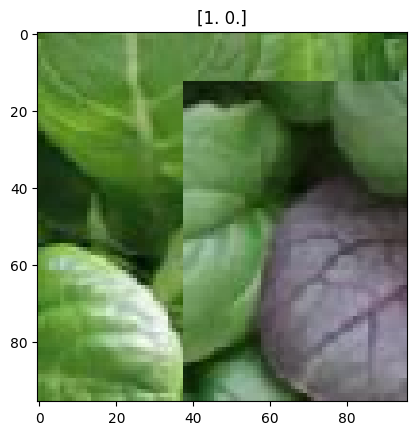

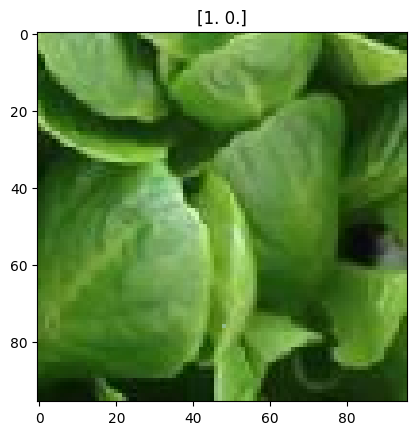

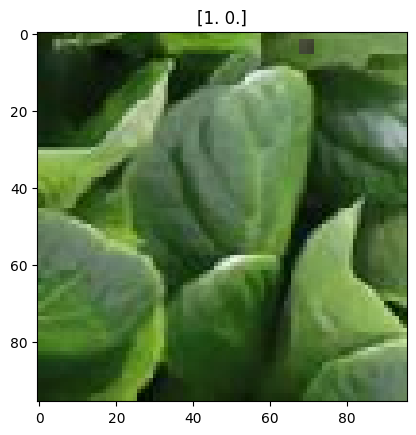

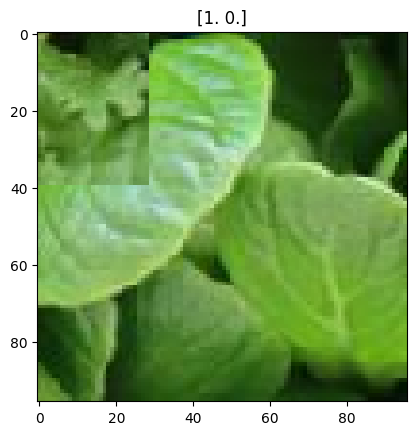

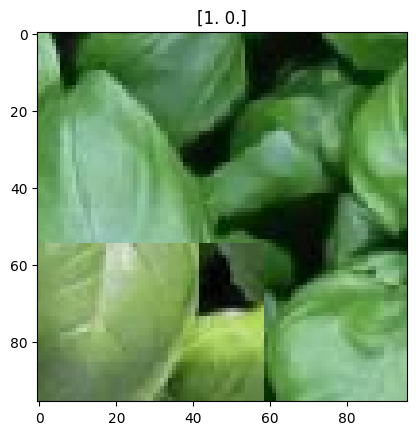

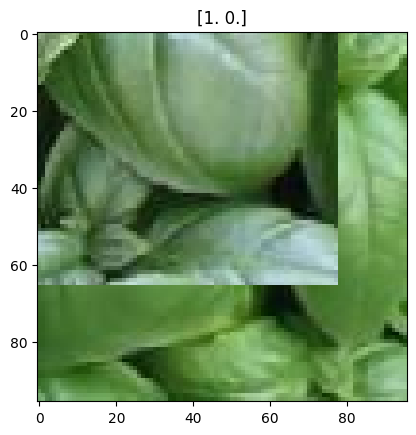

In [ ]:
#---------CUTMIX----------------------------------------------------------------
IMG_SIZE=96

def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w


@tf.function
def cutmix(image1, label1, image2, label2):
    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label


y_train_B = y_train_B.astype(np.float32)

augmented_img = []
augmented_l = []
for i in range(int(len(y_train)/90)):
  for j in range(i+1,int (len(y_train)/90)):
#for i in range(len(y_train)):
 # for j in range(i+1,len(y_train)):
    #if (y_train[i]==y_train[j]) :         #same label
      # Apply CutMix
      img, l = cutmix(X_train[i], y_train_B[i], X_train[j], y_train_B[i])
      augmented_l.append(l)
      augmented_img.append(img)




augmented_img=np.array(augmented_img)
augmented_l=np.array(augmented_l)

print(augmented_img.shape)
print(len(augmented_l))
y_tmp = [1 if np.array_equal(i, [0, 1]) else 0 for i in augmented_l]
#y_tmp = [1 if i==[0, 1] else 0 for i in augmented_l]
print(X_train.shape)
print(len(y_tmp))
X_train = np.concatenate((X_train, augmented_img), axis=0)
y_train = np.concatenate((y_train, y_tmp), axis=0)
print(X_train.shape)
print(y_train.shape)
import random
count = 0

y_train_B = np.concatenate((y_train_B, augmented_l), axis=0)


for i in range(augmented_img.shape[0]):
  if count > 5:
    break
  rand = random.randint(0,augmented_img.shape[0])
  plt.imshow(augmented_img[rand]/255)
  plt.title(augmented_l[rand])
  count = count + 1
  plt.show()



#smote per bilanciare il dataset


###augmenter

In [ ]:
augmenter = keras_cv.layers.Augmenter(
    [
        #keras_cv.layers.RandomFlip(),
        #keras_cv.layers.RandomSharpness(0.2, value_range=(0, 255)),
        #keras_cv.layers.GridMask(),
        #keras_cv.layers.RandAugment(value_range=(0, 255)),
        #keras_cv.layers.CutMix(),
        keras_cv.layers.MixUp(),
        keras_cv.layers.RandomFlip(),
        keras_cv.layers.GridMask(),
        keras_cv.layers.RandAugment(value_range=(0, 255)),
        keras_cv.layers.CutMix(),
    ],
)

def preprocess_data(images, labels, augment=False):
    inputs = {"images": images, "labels": labels}
    outputs = inputs
    if augment:
        outputs = augmenter(outputs)
    return outputs['images'], outputs['labels']

train_dataset = Dataset.from_tensor_slices((X_train, y_train_B))
val_dataset = Dataset.from_tensor_slices((X_val, y_val_B))

train_dataset = train_dataset.batch(32).map(
    lambda x, y: preprocess_data(x, y, augment=True),
        num_parallel_calls=tf.data.AUTOTUNE).prefetch(
            tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).map(
    preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(
        tf.data.AUTOTUNE)

#try

In [ ]:
# Define your CNN binary classifier model
#RICORDA: mettila a false che non si deve trainare LA BATCH NORMALIZATION ------------------


input_shape =  X_train[0].shape
cnn = tfk.applications.EfficientNetV2B2(
    include_top=False,
    weights="imagenet",
  #  input_shape=input_shape,
    include_preprocessing=True,
    )
cnn.trainable = False
print(cnn.name)
print(input_shape)


#data augmentation
data_augmentation = models.Sequential([
      tfkl.RandomTranslation(0.2,0.2),
      tfkl.RandomRotation(0.2),
      tfkl.RandomZoom(0.2),
      #tfkl.RandomZoom('horizontal'),
      #tfkl.RandomZoom('vertical')
])
#preprocessing = tf.keras.applications.preprocess_input

model2 = models.Sequential([
    tfk.Input(shape=input_shape),
    data_augmentation,
    #tfkl.Lambda(preprocessing),
    cnn,
    tfkl.Flatten(),
    #layers.GlobalAveragePooling2D(), #dopo non ci vanno dense o ci va sol quello finale di classificaz (1)
    layers.Dense(128, activation='softmax'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='softmax'),
    layers.Dense(1, activation='softmax')  # Binary classification, so use a sigmoid activation
])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=20)
]


# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])
model2.build(input_shape)
model2.summary()

model2.fit(X_train, y_train, epochs=100, callbacks=callbacks, validation_data=(X_val, y_val))

NameError: ignored

#EfficientNetLARGE

In [ ]:
input_shape =  X_train[0].shape
cnn = tfk.applications.EfficientNetV2M(
    include_top=False,
    weights="imagenet",
  #  input_shape=input_shape,
    include_preprocessing=True,
    )
cnn.trainable = False
print(cnn.name)
print(input_shape)

#data augmentation
data_augmentation = models.Sequential([
      tfkl.RandomTranslation(0.2,0.2),
      tfkl.RandomRotation(0.2),
      tfkl.RandomZoom(0.2)
])


modello = models.Sequential([
      tfk.Input(shape=input_shape),
      #data_augmentation,
      cnn,
      tfkl.GlobalAveragePooling2D(),
      #tfkl.Dropout(0.2),
      tfkl.Dense(2, activation='softmax')
    ])

modello.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20),

]

modello.fit(train_dataset, epochs=200, callbacks=callbacks, validation_data=val_dataset)
modello.save('/gdrive/My Drive/ModelloEfficientnetM_AUG')

NameError: ignored

In [ ]:
modello.summary()

#cutMix-MixUp

In [ ]:
def preprocess(img, label):
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.cast(img, tf.float32)
    return {"images": img, "labels": label}

def prep_for_model(inputs):
    images, labels = inputs["images"], inputs["labels"]
    images = tf.cast(images, tf.float32)
    return images, labels

def cutmix_or_mixup(samples):
    if tf.random.uniform(()) > 0.5:
        samples = keras_cv.layers.CutMix()(samples)
    else:
        samples = keras_cv.layers.MixUp()(samples)
    return samples

train_ds_cm = train_ds.map(preprocess).map( cut_or_mix ).map( prep_for_model)

#ModelloEfficientnetAugmentation

In [ ]:
print(val_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 96, 96, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.int64, name=None))>


In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 96
AUTO = tf.data.AUTOTUNE

input_shape =  X_train[0].shape
cnn = tfk.applications.EfficientNetV2B2(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape,
    include_preprocessing=True,
    )
cnn.trainable = False
print(cnn.name)
print(input_shape)




#data augmentation
#data_augmentation = models.Sequential([
#      tfkl.RandomTranslation(0.2,0.2),
#      tfkl.RandomRotation(0.2),
#      tfkl.RandomZoom(0.2),
#
#])


modelloEffm = models.Sequential([
      tfk.Input(shape=input_shape),
      #data_augmentation,
      cnn,
      tfkl.GlobalAveragePooling2D(),
      #tfkl.Dropout(0.2),
      tfkl.Dense(2, activation='softmax')
    ])

modelloEffm.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20),

]

modelloEffm.fit(train_dataset, epochs=200, callbacks=callbacks, validation_data=val_dataset)
modelloEffm.save('/gdrive/My Drive/ModelloEfficientnet2')

efficientnetv2-b2
(96, 96, 3)
Epoch 1/200
137/137 [==============================] - 53s 298ms/step - loss: 0.6631 - accuracy: 0.6218 - val_loss: 0.5969 - val_accuracy: 0.6619
Epoch 2/200
137/137 [==============================] - 39s 286ms/step - loss: 0.6438 - accuracy: 0.6405 - val_loss: 0.5618 - val_accuracy: 0.7031
Epoch 3/200
137/137 [==============================] - 38s 280ms/step - loss: 0.6401 - accuracy: 0.6444 - val_loss: 0.5464 - val_accuracy: 0.7340
Epoch 4/200
137/137 [==============================] - 36s 262ms/step - loss: 0.6365 - accuracy: 0.6495 - val_loss: 0.5378 - val_accuracy: 0.7361
Epoch 5/200
137/137 [==============================] - 37s 270ms/step - loss: 0.6261 - accuracy: 0.6632 - val_loss: 0.5391 - val_accuracy: 0.7320
Epoch 6/200
137/137 [==============================] - 37s 270ms/step - loss: 0.6422 - accuracy: 0.6451 - val_loss: 0.5383 - val_accuracy: 0.7237
Epoch 7/200
137/137 [==============================] - 37s 266ms/step - loss: 0.6324 - accurac

In [ ]:
modelloEffm.evaluate(X_val, y_val_B)

16/16 [==============================] - 1s 37ms/step - loss: 0.4967 - accuracy: 0.7464


[0.49673452973365784, 0.746391773223877]

# Modello abercrombie

In [ ]:
#test time augmentation
#he con relu, xavier glorot cin altro :)
model = models.Sequential([
      tfkl.RandomFlip("horizontal_and_vertical"),
      tfkl.RandomTranslation(0.2,0.2),
      tfkl.RandomRotation(0.2),
      tfkl.RandomZoom(0.2),
      tfkl.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
      tfkl.MaxPooling2D((3, 3)),
      tfkl.Conv2D(64, (3, 3), activation='relu'),
      tfkl.Flatten(),
      tfkl.Dense(128, activation='relu'),
      tfkl.Dropout(0.75),  # Add dropout with a 50% rate
      tfkl.Dense(2, activation='softmax')  # Binary classification, so use a sigmoid activation
    ])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  # Binary cross-entropy for binary classification
              metrics=['accuracy'])
callbacks = [
   # ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(monitor='val_loss', patience=20),
  #  TensorBoard(log_dir='logs', histogram_freq=1, write_graph=True),
   # ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
]

model.fit(X_train, y_train_B, epochs=200, callbacks=callbacks, validation_data=(X_val, y_val_B))
#model.save('/gdrive/My Drive/ModelloRic')

In [ ]:
model.evaluate(X_test, y_test_B)

In [ ]:
model.save('ModelloRic')
#del model

# Model Transfer


In [ ]:
# Train the model

mobile = tfk.applications.MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights="imagenet",
    pooling='avg',
)

# Use the supernet as feature extractor, i.e. freeze all its weigths
mobile.trainable = False

# Create an input layer with shape (224, 224, 3)
inputs = tfk.Input(shape=(96, 96, 3))
# Connect MobileNetV2 to the input

aug = models.Sequential([
  tfkl.RandomFlip("horizontal_and_vertical"),
  tfkl.RandomTranslation(0.2,0.2),
  tfkl.RandomRotation(0.2),
  tfkl.RandomZoom(0.2)])

x = aug(inputs)

x = mobile(x)
# Add a Dense layer with 2 units and softmax activation as the classifier
outputs = tfkl.Dense(2, activation='softmax')(x)

# Create a Model connecting input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with Categorical Cross-Entropy loss and Adam optimizer
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics=['accuracy'])

# Display model summary
tl_model.summary()

# tfk.utils.plot_model(mobile, show_shapes=True)

# tl_model.fit(preprocess_input(((X_train))*255), # We need to apply the preprocessing thought for the MobileNetV2 network
#              y_train_B, batch_size = 16, epochs = 200, validation_data = (preprocess_input(X_val*255), y_val_B), # We need to apply the preprocessing thought for the MobileNetV2 network
#     callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
# )



In [ ]:
# Save the best model
tl_model.save('TransferLearningModel')
del tl_model

# Convex

In [ ]:
cnn = tf.keras.applications.ConvNeXtLarge(
    model_name="convnext_large",
    include_top=False,
    include_preprocessing=True,
    weights="imagenet"
)
cnn.trainable = False
print(cnn.name)
print(cnn.layers[-1])



#data augmentation
data_augmentation = models.Sequential([
      tfkl.RandomTranslation(0.2,0.2),
      tfkl.RandomRotation(0.2),
      tfkl.RandomZoom(0.2)
])


modellino = models.Sequential([
      tfk.Input(shape=input_shape),
      data_augmentation,
      cnn,
      tfkl.GlobalAveragePooling2D(),
      #tfkl.Dropout(0.2),
      tfkl.Dense(2, activation='softmax')
    ])

modellino.compile(optimizer=AdamW(learning_rate=0.001, weight_decay = 0.04),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20),
    ModelCheckpoint(filepath="/kaggle/working/model_weights.h5", save_weights_only=True, verbose=1)
]

modellino.fit(train_dataset, epochs=200, callbacks=callbacks, batch_size = 64, validation_data=val_dataset)
modellino.save('/gdrive/My Drive/ModelloConvneXtNetLarge')

# Fine tuning

In [ ]:
# then we retrain with a low ln at the end

# Re-load the model after transfer learning
ft_model = tfk.models.load_model('/gdrive/My Drive/ModelloEfficientnetM_AUG')

In [ ]:
#from tensorflow.keras.src.layers import BatchNormalization
# Set all MobileNetV2 layers as trainable
ft_model.get_layer('efficientnetv2-m').trainable = True
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-m').layers):
  if layer.__class__.__name__ == 'BatchNormalization':
    layer.trainable = False
  print(i, layer.name, layer.trainable) #i = numero layers. ne tolgo un po alla volta, metto fino a N false e resto true, vedo io che numero mettere. (nel for sopra)

0 input_15 True
1 rescaling_9 True
2 normalization_9 True
3 stem_conv True
4 stem_bn False
5 stem_activation True
6 block1a_project_conv True
7 block1a_project_bn False
8 block1a_project_activation True
9 block1b_project_conv True
10 block1b_project_bn False
11 block1b_project_activation True
12 block1b_drop True
13 block1b_add True
14 block2a_expand_conv True
15 block2a_expand_bn False
16 block2a_expand_activation True
17 block2a_project_conv True
18 block2a_project_bn False
19 block2b_expand_conv True
20 block2b_expand_bn False
21 block2b_expand_activation True
22 block2b_project_conv True
23 block2b_project_bn False
24 block2b_drop True
25 block2b_add True
26 block2c_expand_conv True
27 block2c_expand_bn False
28 block2c_expand_activation True
29 block2c_project_conv True
30 block2c_project_bn False
31 block2c_drop True
32 block2c_add True
33 block3a_expand_conv True
34 block3a_expand_bn False
35 block3a_expand_activation True
36 block3a_project_conv True
37 block3a_project_bn False

In [ ]:
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-5), metrics='accuracy')
ft_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Functio  (None, 3, 3, 1408)        8769374   
 nal)                                                            
                                                                 
 global_average_pooling2d_5  (None, 1408)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_5 (Dense)             (None, 2)                 2818      
                                                                 
Total params: 8772192 (33.46 MB)
Trainable params: 8607616 (32.84 MB)
Non-trainable params: 164576 (642.88 KB)
_________________________________________________________________


In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20),
]

ft_model.fit(X_train, y_train_B, epochs=200, callbacks=callbacks, validation_data=(X_val, y_val_B))

Epoch 1/200
137/137 [==============================] - 55s 100ms/step - loss: 0.4109 - accuracy: 0.8186 - val_loss: 0.3951 - val_accuracy: 0.8186
Epoch 2/200
137/137 [==============================] - 12s 87ms/step - loss: 0.3495 - accuracy: 0.8490 - val_loss: 0.3349 - val_accuracy: 0.8289
Epoch 3/200
137/137 [==============================] - 11s 81ms/step - loss: 0.3021 - accuracy: 0.8706 - val_loss: 0.3081 - val_accuracy: 0.8495
Epoch 4/200
137/137 [==============================] - 10s 75ms/step - loss: 0.2694 - accuracy: 0.8864 - val_loss: 0.2955 - val_accuracy: 0.8660
Epoch 5/200
137/137 [==============================] - 12s 84ms/step - loss: 0.2419 - accuracy: 0.8992 - val_loss: 0.3060 - val_accuracy: 0.8639
Epoch 6/200
137/137 [==============================] - 11s 77ms/step - loss: 0.2168 - accuracy: 0.9116 - val_loss: 0.2743 - val_accuracy: 0.8784
Epoch 7/200
137/137 [==============================] - 11s 83ms/step - loss: 0.1949 - accuracy: 0.9219 - val_loss: 0.2681 - val_a

In [ ]:
ft_model.save('/gdrive/My Drive/TransferLearningModel_M')

In [ ]:


# preprocessing = tf.keras.Sequential([
#            tfkl.RandomTranslation(0.2,0.2),
#            tfkl.RandomZoom(0.2),
#            tfkl.RandomRotation(0.2),
#            tfkl.RandomFlip("horizontal_and_vertical")
#        ])
#    aug_images = [preprocessing(X[i]) for i in range(X.shape[0])]
#    print(len(aug_images))
#    data = np.concatenate((data, aug_images), axis=0)
#    labels = np.concatenate((labels, labels), axis=0)
#    return aug_images, labels
#

### Da non rifare perchè nel modello bello non si runnava questo ma ci si fermava prima

In [ ]:
ft_model = tfk.models.load_model('/gdrive/My Drive/TransferLearningModel3')

In [ ]:
# Freeze first N layers, e.g., until the 133rd one
N = 133
for i, layer in enumerate(ft_model.get_layer('efficientnetv2-b2').layers[N:]):
  layer.trainable=True
for layer in ft_model.get_layer('efficientnetv2-b2').layers:
  print(layer)
 # if layer.__class__.__name__ == 'BatchNormalization':
  #  layer.trainable = False
# for i, layer in enumerate(ft_model.get_layer('mobilenetv2_1.00_96').layers):
#    #print(i, layer.name, layer.trainable)
ft_model.summary()

ft_model.compile(loss=tfk.losses.BinaryCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy') #messo categorical al posto di binary

# Fine-tune the model
ft_history = ft_model.fit(
    x = preprocess_input(X_train*255), # We need to apply the preprocessing thought for the MobileNetV2 network,tolto il 255
    y = y_train_B,
    batch_size = 16,
    epochs = 200,
    validation_data = (preprocess_input(X_val*255), y_val_B), # We need to apply the preprocessing thought for the MobileNetV2 network tolto il 255
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)]
).history

ft_model.save('TransferLearningModel33')

In [ ]:
ft_model.evaluate(X_val, y_val_B)

#model 6

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2
from tensorflow.keras import layers, models

# Load the EfficientNetV2 model with ImageNet weights
base_model = EfficientNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),  # Adjust input shape based on your requirements
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    include_preprocessing=True,
)

# Freeze the pre-trained layers
base_model.trainable = False

# Create a new model with a custom top layer for binary classification
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification with sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()